In [63]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [64]:
Data = pd.read_csv('./bank_customer_survey.csv')
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [65]:
len(Data.columns)

17

In [66]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [67]:
Data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


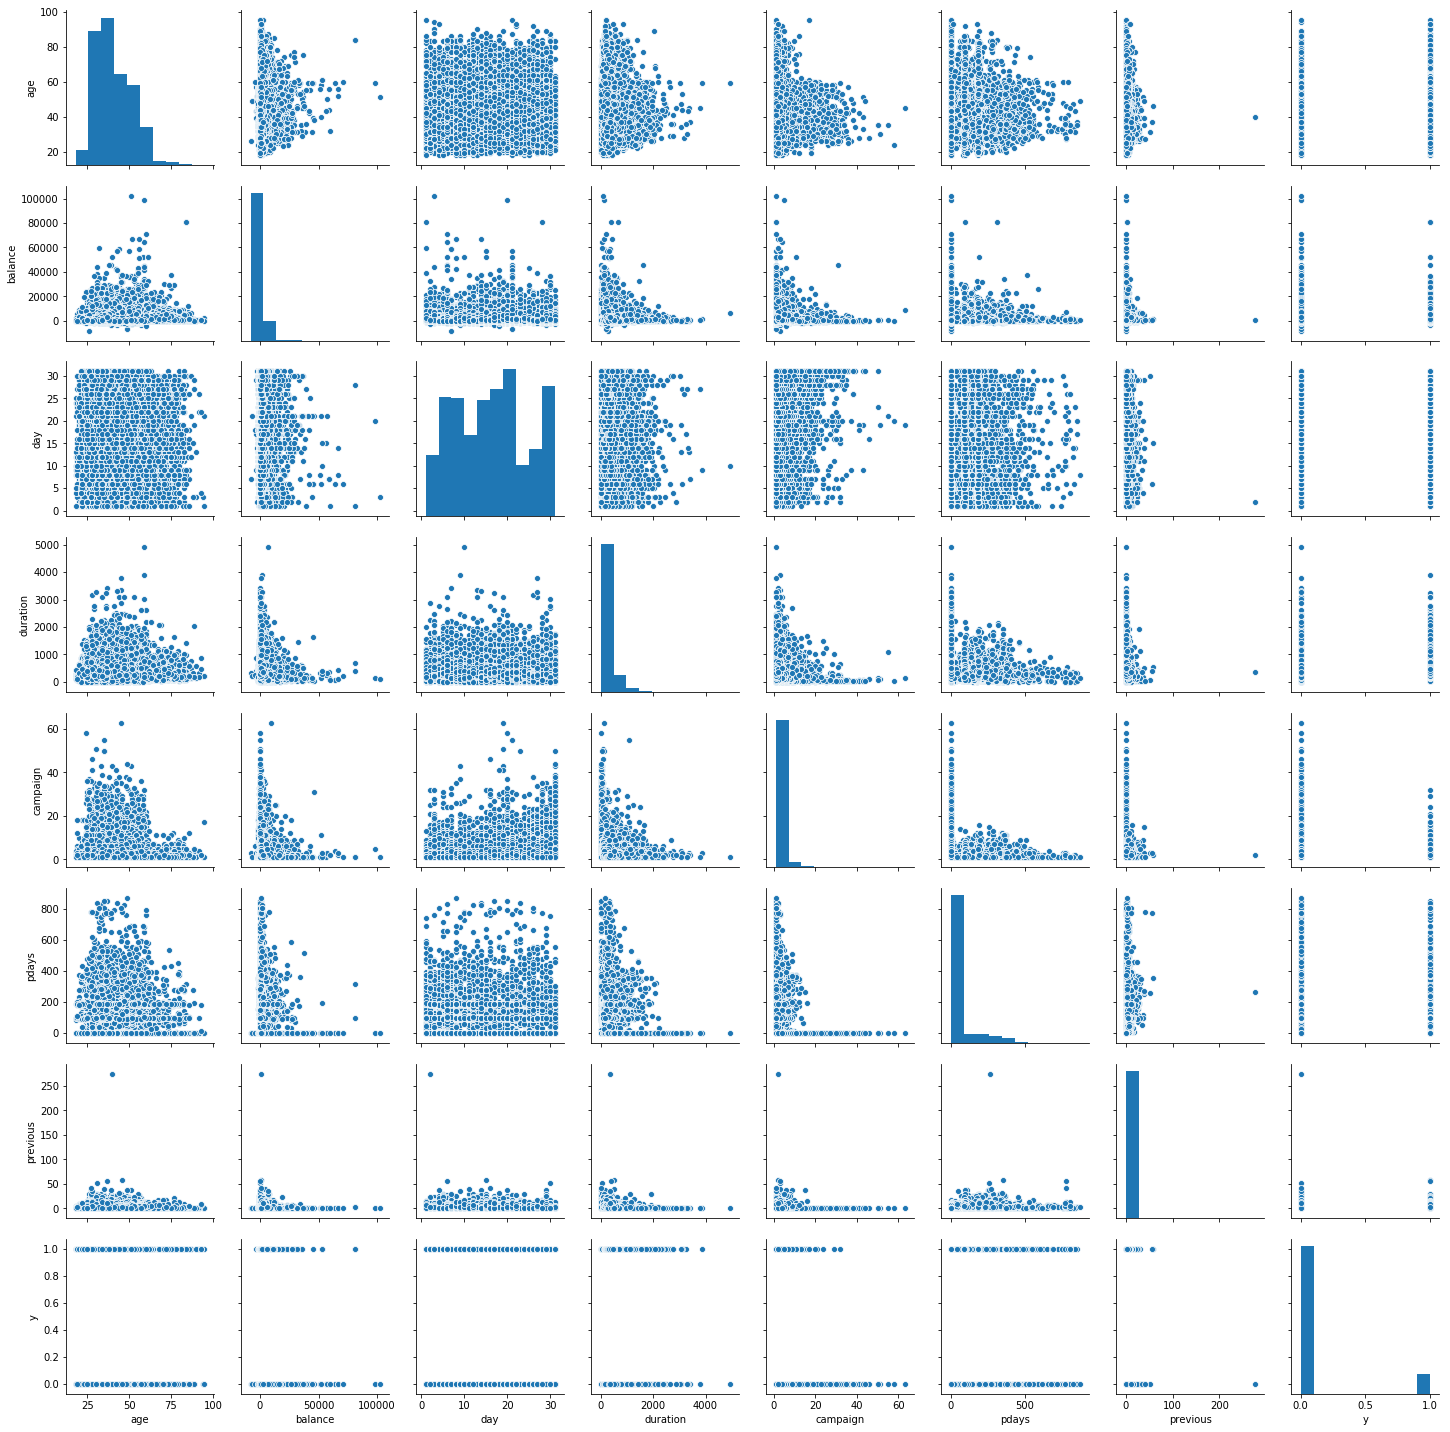

In [68]:
sns.pairplot(Data)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

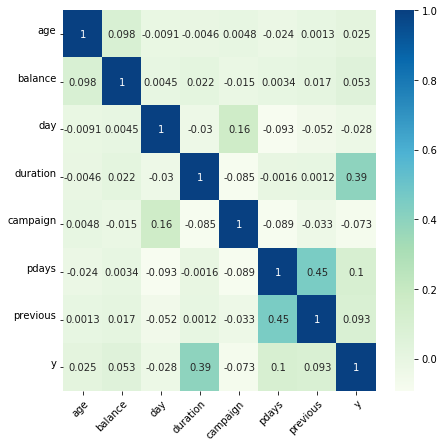

In [69]:
cor = Data.corr()

fig, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cor, annot = True, cmap = 'GnBu')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(rotation=360, ha ='right', rotation_mode='anchor')

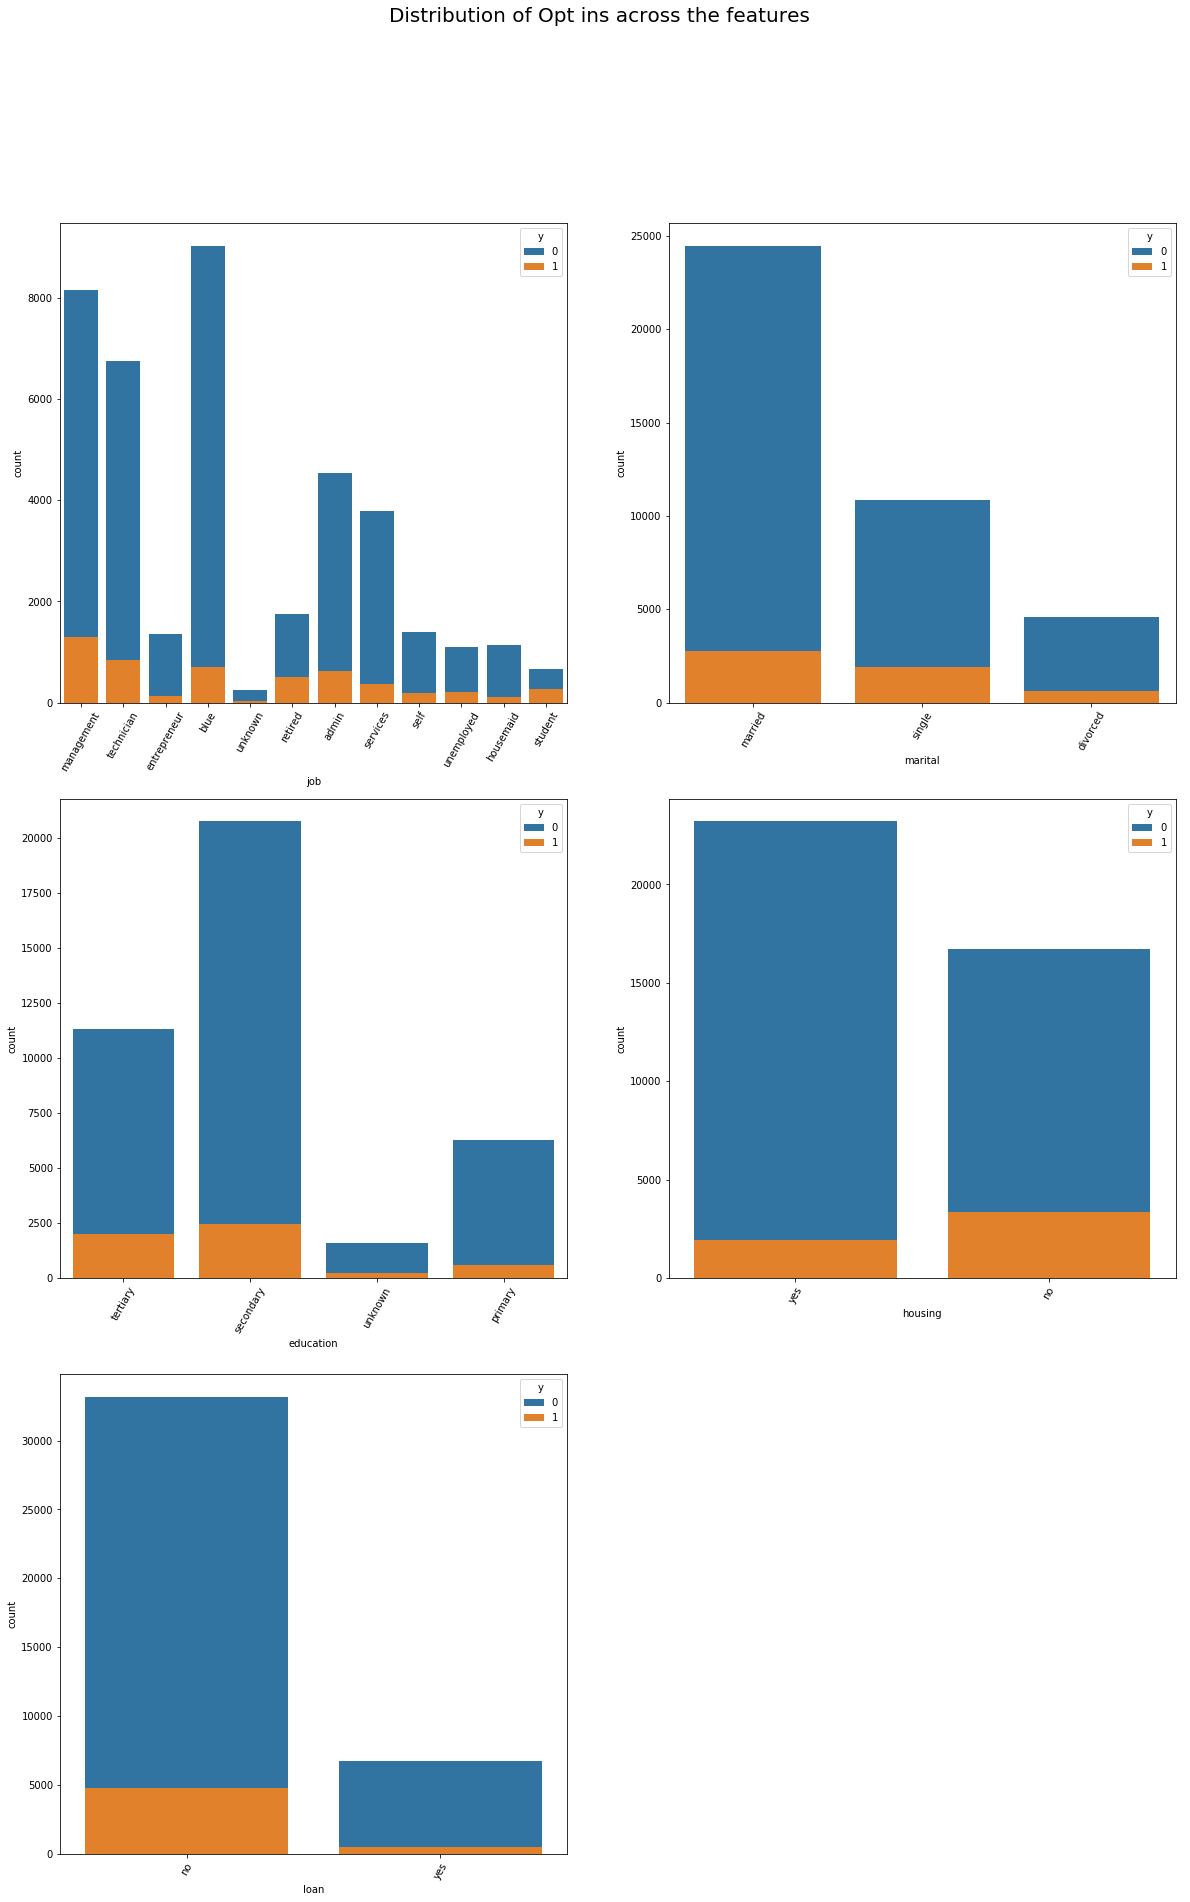

In [70]:
string = ['job', 'marital', 'education', 'housing', 'loan']

counter = 0 
nrows =3
ncols = 2 

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,30))

for i in range(nrows):
    for j in range(ncols):
        
        ax = axes[i][j]
        
        if counter < len(string):
            
            g = sns.countplot(x =string[counter], hue = 'y' , data = Data, dodge = False, ax = ax)
            
            g.set_xticklabels(g.get_xticklabels(), rotation = 60)
            plt.suptitle('Distribution of Opt ins across the features', fontsize = 20)
        
            
        else:
            
            ax.set_axis_off()
    
        counter += 1
plt.show()





In [71]:
housing = Data[Data['housing']=='yes']
no_housing = Data[Data['housing']=='no']


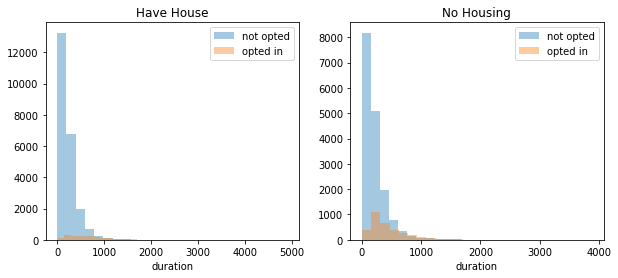

In [72]:

fig, axes = plt.subplots(1,2, figsize=(10,4))

ax = sns.distplot(housing[housing['y']==0].duration, bins = 25, label = 'not opted', ax = axes[0], kde = False)
ax = sns.distplot(housing[housing['y']==1].duration, bins =25, label = 'opted in', ax= axes[0], kde = False)
ax.set_title('Have House')
ax.legend()

ax = sns.distplot(no_housing[no_housing['y']==0].duration, bins = 25, label = 'not opted', ax = axes[1], kde = False)
ax = sns.distplot(no_housing[no_housing['y']==1].duration, bins =25, label = 'opted in', ax= axes[1], kde = False)
ax.set_title('No Housing')
ax.legend()


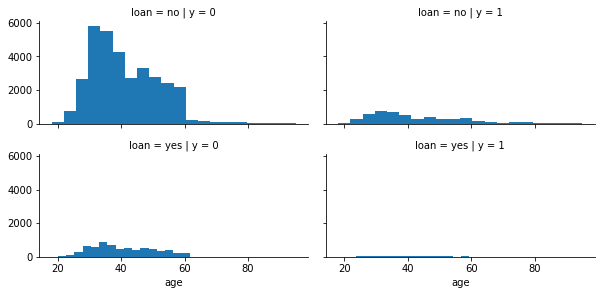

In [73]:
job = sns.FacetGrid(Data, col ='y', row = 'loan', height = 2.1, aspect =2)

job.map(plt.hist, 'age', bins =20)
job.add_legend();

In [74]:
optedin = Data[Data['y']==1]

Text(0.5, 1.0, 'Number of opt ins across the year')

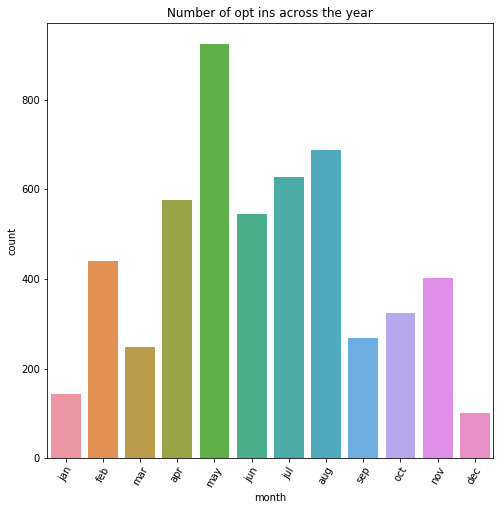

In [75]:
optinmonth = optedin[['month']].groupby(optedin['month']).count()
optinmonth = optinmonth.reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
optinmonth.columns = ['count']
optinmonth =optinmonth.reset_index()

fig, ax =plt.subplots(figsize = (8,8))
sns.barplot(optinmonth['month'], optinmonth['count'])
plt.xticks(rotation=60)
plt.title('Number of opt ins across the year')


### Data preprocessing


##### Converting features



In [76]:
Data.sample(3, random_state = 123)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7281,56,technician,married,secondary,no,589,yes,no,unknown,29,may,535,2,-1,0,unknown,1
19469,37,management,married,tertiary,no,649,no,no,cellular,7,aug,64,2,-1,0,unknown,0
31637,27,unemployed,single,secondary,no,1972,no,no,cellular,6,apr,97,1,-1,0,unknown,0


In [77]:
data = [Data]

In [78]:
jobs = {'management': 0, 'technician': 1, 'entrepreneur':2, 'blue':3, 'unknown':4, 'retired':5, 'admin':6, 'services':7, 'self':8, 'unemployed':9, 'housemaid':10, 'student':11}
marital = {'married':0, 'single':1, 'divorced':2}
education = {'tertiary':0, 'secondary':1, 'unknown':2, 'primary':3}
default = {'no':0, 'yes':1}
housing = {'no':0, 'yes':1}
loan = {'no':0, 'yes':1}
contact = {'unknown':0, 'cellular':1, 'telephone':2}
month = {'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}
poutcome = {'unknown':0, 'failure':1, 'other':2, 'success':3}

for x in data:
    x['job'] = x['job'].map(jobs)
    x['marital'] = x['marital'].map(marital)
    x['education'] = x['education'].map(education)
    x['default'] = x['default'].map(default)
    x['housing'] = x['housing'].map(housing)
    x['loan'] = x['loan'].map(loan)
    x['contact'] = x['contact'].map(contact)
    x['month'] = x['month'].map(month)
    x['poutcome'] = x['poutcome'].map(poutcome)
    

In [79]:
Data.sample(3, random_state= 123)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7281,56,1,0,1,0,589,1,0,0,29,4,535,2,-1,0,0,1
19469,37,0,0,0,0,649,0,0,1,7,7,64,2,-1,0,0,0
31637,27,9,1,1,0,1972,0,0,1,6,3,97,1,-1,0,0,0


In [ ]:
corr = Data

fig, ax = plt.subplots(figsize =(20,20))
sns.heatmap(corr, annot = True, cmap = 'GnBu')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(rotation=360, ha ='right', rotation_mode='anchor')

In [40]:
X, y = Data.drop(['y'], axis =1), Data['y']

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)